In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
train = pd.read_csv("titanic.csv")


In [113]:
train1 = pd.read_csv("titanic.csv")


In [77]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

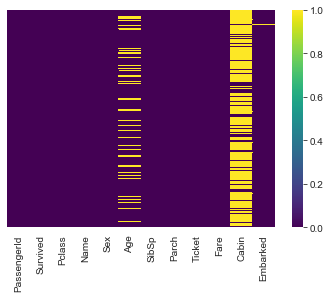

In [79]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

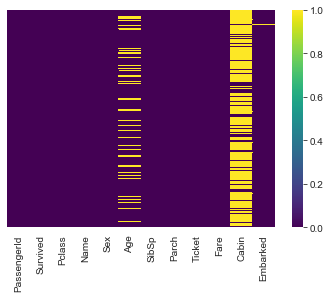

In [80]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

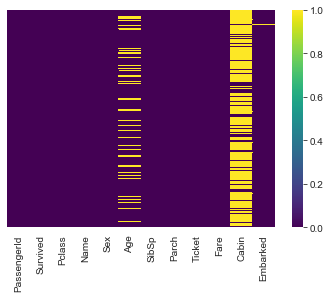

In [81]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### *Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"*

### *Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.*

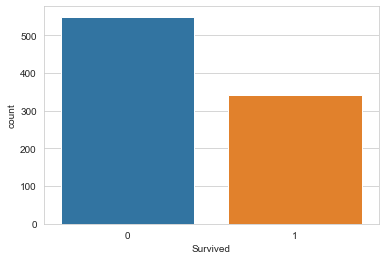

In [82]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=train)

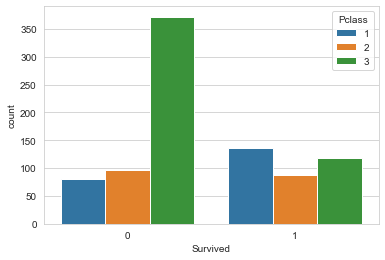

In [83]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue='Pclass',data=train)

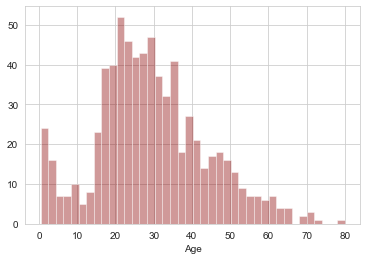

In [9]:
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

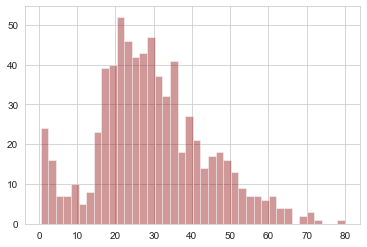

In [85]:
train['Age'].hist(bins=40,alpha=0.4,color='darkred')

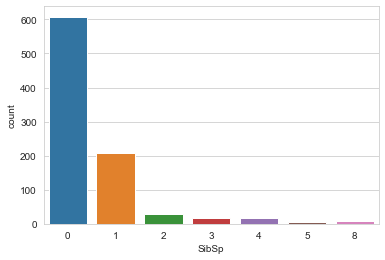

In [86]:
sns.countplot(x='SibSp',data=train)

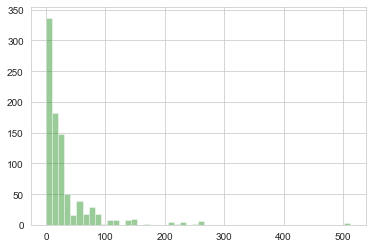

In [87]:
train['Fare'].hist(color='green',alpha=0.4,bins=50)

## Data Cleaing

### *We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

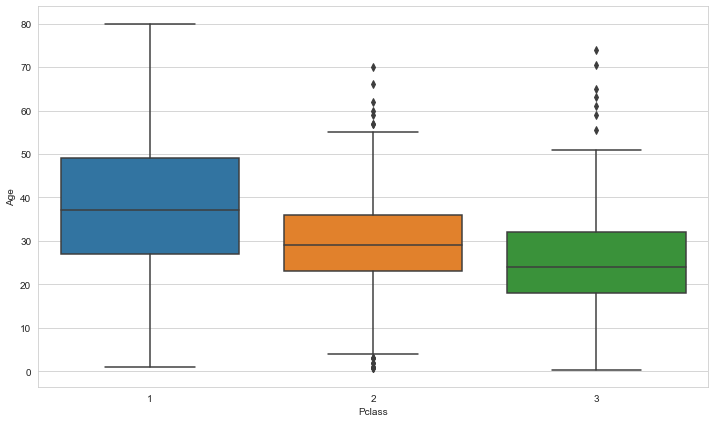

In [88]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [90]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [91]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

In [92]:
 train.drop('Cabin',axis=True,inplace=True)

In [93]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features
### We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [94]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
embark= pd.get_dummies(train['Embarked'],drop_first=True)

In [95]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [96]:
train.head(5)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [97]:
train= pd.concat([train,sex,embark],axis=1)

Great! Our data is ready for our model!


## Building a Logistic Regression model
### Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

Train Test Split

In [98]:
train.drop('Survived',axis=1).head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [99]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [101]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
predictions = logmodel.predict(X_test)

In [104]:
accuracy=confusion_matrix(y_test,predictions)

In [105]:
accuracy

array([[133,  21],
       [ 42,  72]], dtype=int64)

In [106]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7649253731343284

## Evaluation

### We can check precision,recall,f1-score using classification report!


In [107]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.63      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [108]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
for i in train.columns:
    print(i ,":" , len(train[i].unique()), "labels")

PassengerId : 891 labels
Survived : 2 labels
Pclass : 3 labels
Age : 88 labels
SibSp : 7 labels
Parch : 7 labels
Fare : 248 labels
male : 2 labels
Q : 2 labels
S : 2 labels


In [42]:
 train['Age'].value_counts().sort_values(ascending=False).head(20)

24.0    166
37.0     36
29.0     31
22.0     27
18.0     26
28.0     25
30.0     25
19.0     25
21.0     24
25.0     23
36.0     22
32.0     18
26.0     18
27.0     18
35.0     18
31.0     17
16.0     17
23.0     15
20.0     15
33.0     15
Name: Age, dtype: int64

In [44]:
top1=  [x for x in train['Age'].value_counts().sort_values(ascending=False).head(10).index]

In [49]:
top1

[24.0, 37.0, 29.0, 22.0, 18.0, 28.0, 30.0, 19.0, 21.0, 25.0]

In [109]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [114]:
train1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
